### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read Data

In [2]:
data = pd.read_csv("hotel_bookings.csv")

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [4]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
data.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [6]:
data.shape

(119390, 32)

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.duplicated().sum()

31994

### Deleting/ Filling empty data

In [9]:
data.drop(['agent', 'company'], axis=1, inplace=True)

In [10]:
data['country'].value_counts().index[0]

'PRT'

In [11]:
data['country'].fillna(data['country'].value_counts().index[0], inplace=True)

In [12]:
data['children'].value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [13]:
data['children'].fillna(0, inplace=True)

In [14]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.shape

(87351, 30)

### EDA

In [17]:
country_Data = data[data['is_canceled']==0]['country'].value_counts().reset_index()

In [18]:
country_Data.columns=['Country','NoOfGuests']

In [19]:
country_Data

,Country,NoOfGuests
0,PRT,18053
1,GBR,8446
2,FRA,7104
3,ESP,5388
4,DEU,4332
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


<BarContainer object of 165 artists>

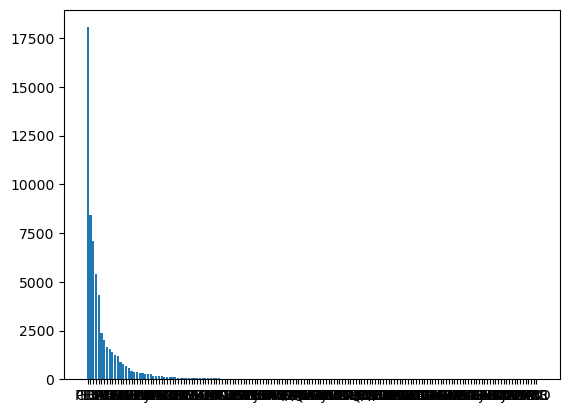

In [20]:
plt.bar(country_Data['Country'], country_Data['NoOfGuests'])

### Gepgraphical Representation of Guests from different Countries

In [21]:
##! pip install plotly
##!pip install chart_studio
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.express as px

In [22]:
map_guest = px.choropleth(country_Data, locations=country_Data['Country'], color=country_Data['NoOfGuests'],
             hover_name=country_Data['Country'],
             title="Home Country of Guests")

In [23]:
map_guest.show()

<Axes: xlabel='reserved_room_type', ylabel='adr'>

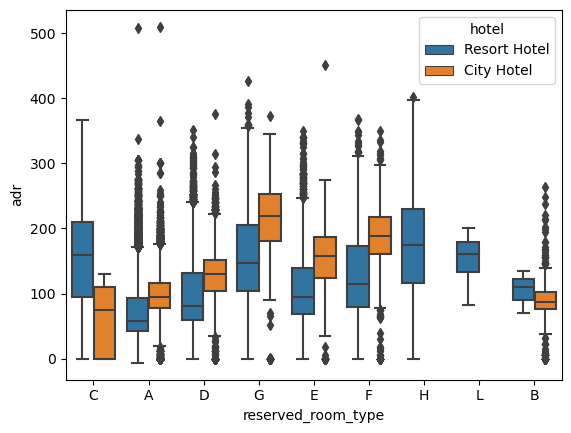

In [24]:
data[data['is_canceled']==0]
sns.boxplot(data=data[data['is_canceled']==0],
           x='reserved_room_type',
           y='adr',
           hue='hotel')

In [25]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [26]:
data_resort = data[(data['is_canceled']==0) & (data['hotel']=='Resort Hotel')]
data_city = data[(data['is_canceled']==0) & (data['hotel']=='City Hotel')]

In [27]:
data_resort_month = data_resort['arrival_date_month'].value_counts()
data_city_month = data_city['arrival_date_month'].value_counts()

In [28]:
data_resort_month = data_resort_month.reset_index()
data_city_month = data_city_month.reset_index()

In [29]:
data_resort_month

,arrival_date_month,count
0,August,3152
1,July,3011
2,May,2246
3,October,2209
4,March,2189
5,April,2167
6,February,2045
7,June,1927
8,September,1875
9,November,1743


In [30]:
data_city_month

,arrival_date_month,count
0,August,4481
1,July,3843
2,May,3665
3,March,3489
4,June,3484
5,April,3328
6,September,3171
7,October,3081
8,February,2629
9,November,2196


<Axes: xlabel='arrival_date_month', ylabel='count'>

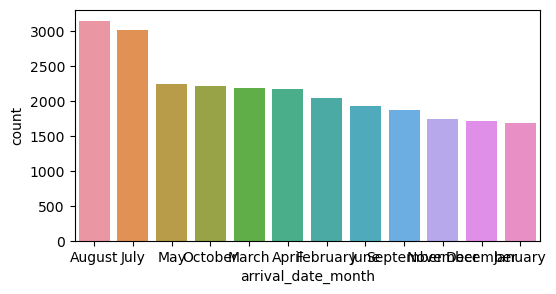

In [31]:
plt.figure(figsize=(6,3))
sns.barplot(data=data_resort_month,
           x='arrival_date_month',
           y='count')

<Axes: xlabel='arrival_date_month', ylabel='count'>

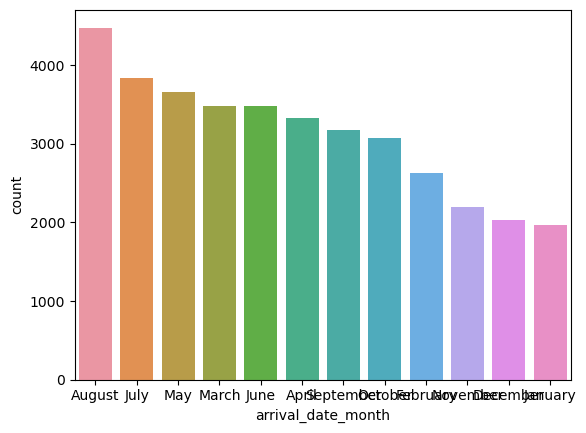

In [32]:
sns.barplot(data=data_city_month,
           x='arrival_date_month',
           y='count')

In [33]:
merged_data = data_resort_month.merge(data_city_month, on='arrival_date_month')

In [34]:
merged_data.columns = ('Month', 'Resort', 'City')

In [35]:
merged_data

,Month,Resort,City
0,August,3152,4481
1,July,3011,3843
2,May,2246,3665
3,October,2209,3081
4,March,2189,3489
5,April,2167,3328
6,February,2045,2629
7,June,1927,3484
8,September,1875,3171
9,November,1743,2196


In [36]:
px

<module 'plotly.express' from 'C:\\Users\\bansalk\\AppData\\Local\\anaconda3\\Lib\\site-packages\\plotly\\express\\__init__.py'>

In [37]:
px.line(data_frame=merged_data, x='Month', y=['Resort', 'City'])

In [38]:
##!pip install sorted-months-weekdays
##!pip install sort-dataframeby-monthorweek

In [39]:
import sort_dataframeby_monthorweek as sd

In [40]:
merged_data = sd.Sort_Dataframeby_Month(merged_data, 'Month')

In [41]:
merged_data

,Month,Resort,City
0,January,1685,1966
1,February,2045,2629
2,March,2189,3489
3,April,2167,3328
4,May,2246,3665
5,June,1927,3484
6,July,3011,3843
7,August,3152,4481
8,September,1875,3171
9,October,2209,3081


In [42]:
px.line(data_frame=merged_data, x='Month', y=['Resort', 'City'])

In [43]:
data = sd.Sort_Dataframeby_Month(data, 'arrival_date_month')

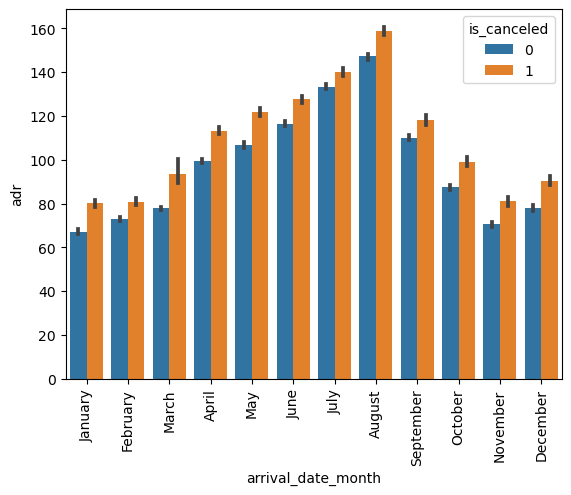

In [44]:
sns.barplot(data=data, x='arrival_date_month', y='adr', hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

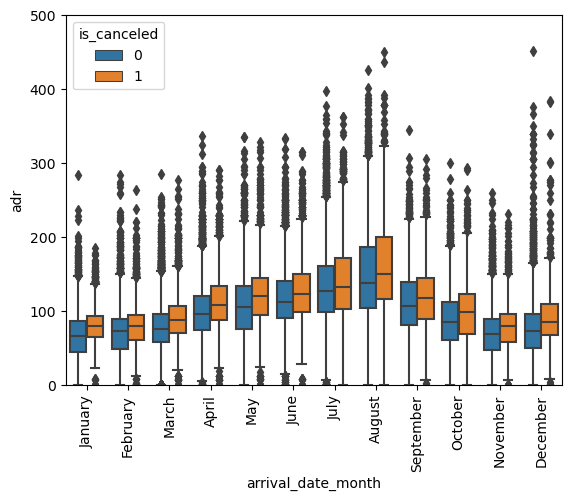

In [45]:
sns.boxplot(data=data, x='arrival_date_month', y='adr', hue='is_canceled')
plt.xticks(rotation='vertical')
plt.ylim(0,500)
plt.show()

In [46]:
pd.crosstab(index=data['stays_in_week_nights'], columns=data['stays_in_weekend_nights'])

stays_in_weekend_nights,0,1,2,3,4,5,6,7,8,9,10,12,13,14,16,18,19
stays_in_week_nights,,,,,,,,,,,,,,,,,
0,651,3956,1561,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13204,4579,4390,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9600,5992,5146,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7452,4928,3869,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3494,2147,2231,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,723,1040,7526,284,88,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,783,266,330,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,426,372,169,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,374,123,116,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
def week_function(row):
    feature1 = 'stays_in_week_nights'
    feature2 = 'stays_in_weekend_nights'
    if row[feature1] == 0 and row[feature2] > 0:
        return 'stay_just_weekend'
    if row[feature1] >0 and row[feature2] == 0:
        return 'stay_just_weekdays'
    if row[feature1] >0 and row[feature2] > 0:
        return 'stay_both_weekdays_weekend'
    else:
        return 'undefined_data'

In [48]:
data['weekday_or_weekend'] = data.apply(func=week_function, axis=1)

In [49]:
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekday_or_weekend
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,No Deposit,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,stay_just_weekdays
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,No Deposit,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,stay_just_weekdays
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,0,No Deposit,0,Transient,89.00,0,1,No-Show,1/1/2016,stay_just_weekdays
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,0,No Deposit,0,Transient,73.46,0,2,Check-Out,1/3/2016,stay_just_weekdays
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,0,No Deposit,0,Transient,119.00,0,0,Canceled,12/22/2015,stay_just_weekdays
5,Resort Hotel,1,76,2016,January,1,1,1,2,2,...,0,No Deposit,0,Transient,57.90,0,1,Canceled,12/20/2015,stay_both_weekdays_weekend
6,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,0,No Deposit,0,Transient,90.17,0,2,Check-Out,1/3/2016,stay_just_weekdays
7,Resort Hotel,1,113,2016,January,1,2,0,1,2,...,0,Non Refund,0,Transient,72.00,0,0,Canceled,11/16/2015,stay_just_weekdays
8,Resort Hotel,0,110,2016,January,1,2,2,5,2,...,0,No Deposit,0,Transient,46.93,0,3,Check-Out,1/9/2016,stay_both_weekdays_weekend
9,Resort Hotel,1,103,2016,January,2,3,2,3,2,...,0,No Deposit,0,Transient,36.45,0,1,Canceled,12/12/2015,stay_both_weekdays_weekend


In [50]:
data['weekday_or_weekend'].value_counts()

weekday_or_weekend
stay_both_weekdays_weekend    46710
stay_just_weekdays            34473
stay_just_weekend              5517
undefined_data                  651
Name: count, dtype: int64

In [51]:
data_mon = data.groupby(['arrival_date_month', 'weekday_or_weekend']).size().unstack().reset_index()

In [52]:
data_mon

weekday_or_weekend,arrival_date_month,stay_both_weekdays_weekend,stay_just_weekdays,stay_just_weekend,undefined_data
0,April,4529,2889,453,32
1,August,6802,3801,602,49
2,December,2428,2295,324,80
3,February,2999,2628,403,59
4,January,1961,2300,378,50
5,July,6220,3212,563,57
6,June,4184,3090,452,38
7,March,3625,3434,387,62
8,May,4322,3350,630,51
9,November,2374,2258,292,68


In [53]:
data_mon = sd.Sort_Dataframeby_Month(data_mon, 'arrival_date_month')

In [54]:
data_mon.set_index('arrival_date_month', inplace=True)

In [55]:
data_mon

,stay_both_weekdays_weekend,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1961,2300,378,50
February,2999,2628,403,59
March,3625,3434,387,62
April,4529,2889,453,32
May,4322,3350,630,51
June,4184,3090,452,38
July,6220,3212,563,57
August,6802,3801,602,49
September,3629,2552,484,23


<Axes: xlabel='arrival_date_month'>

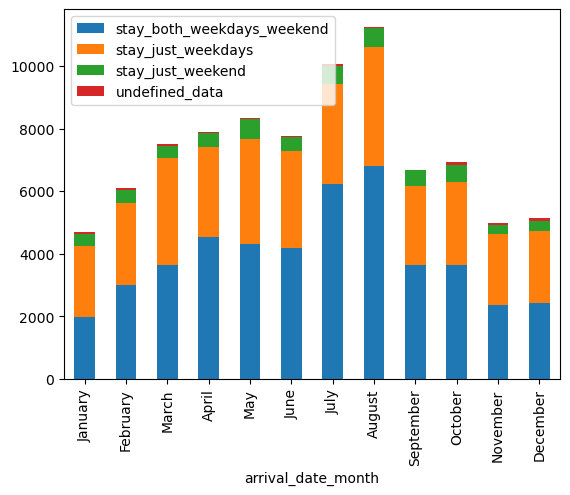

In [56]:
data_mon.plot(kind='bar', stacked=True)

In [57]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekday_or_weekend'],
      dtype='object')

In [58]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [59]:
data['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [60]:
dict1 = {'No Deposit' : 0, 'Non Refund' : 1, 'Refundable' : 2}

In [61]:
data['deposit_type'].map(dict1)

0        0
1        0
2        0
3        0
4        0
        ..
87346    0
87347    0
87348    0
87349    0
87350    0
Name: deposit_type, Length: 87351, dtype: int64

In [62]:
data['deposit_given'] = data['deposit_type'].map(dict1)

In [63]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekday_or_weekend',
       'deposit_given'],
      dtype='object')

In [64]:
def total_members(row):
    return row['adults'] + row['children'] + row['babies']

In [65]:
data.apply(total_members, axis=1)

0        2.0
1        4.0
2        2.0
3        2.0
4        4.0
        ... 
87346    3.0
87347    2.0
87348    0.0
87349    2.0
87350    2.0
Length: 87351, dtype: float64

In [66]:
data['total_members'] = data.apply(total_members, axis=1)

In [67]:
def total_nights(row):
    return row['stays_in_weekend_nights'] + row['stays_in_week_nights'] 

In [68]:
data['total_nights'] = data.apply(total_nights, axis=1)

In [69]:
def is_family(row):
    if row['adults'] >0 :
        if row['children'] >0 or row['babies'] >0:
            return 1
        else:
            return 0
    return 0

In [70]:
data['is_family'] = data.apply(is_family, axis=1)

In [71]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekday_or_weekend',
       'deposit_given', 'total_members', 'total_nights', 'is_family'],
      dtype='object')

In [72]:
data.drop(['adults', 'children', 'babies', 'deposit_type'], axis=1, inplace=True)

In [73]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'weekday_or_weekend', 'deposit_given',
       'total_members', 'total_nights', 'is_family'],
      dtype='object')

# Feature Encoding

In [74]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

In [75]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [76]:
object_features = [col for col in data.columns if data[col].dtype =='object']

In [77]:
object_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'weekday_or_weekend']

In [78]:
data[object_features]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,weekday_or_weekend
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016,stay_just_weekdays
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016,stay_just_weekdays
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016,stay_just_weekdays
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016,stay_just_weekdays
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015,stay_just_weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...
87346,City Hotel,December,BB,BRA,Direct,Direct,E,F,Transient,Check-Out,1/6/2017,stay_both_weekdays_weekend
87347,City Hotel,December,SC,FRA,Online TA,TA/TO,A,A,Transient,Check-Out,1/6/2017,stay_both_weekdays_weekend
87348,City Hotel,December,BB,PRT,Direct,Direct,E,K,Transient,Check-Out,1/6/2017,stay_both_weekdays_weekend
87349,City Hotel,December,BB,FRA,Offline TA/TO,TA/TO,A,B,Transient,Check-Out,1/7/2017,stay_both_weekdays_weekend


In [79]:
data_cat = data[object_features]

In [80]:
from warnings import filterwarnings
filterwarnings("ignore")

In [81]:
data_cat['cancellation'] = data['is_canceled']

In [82]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,weekday_or_weekend,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016,stay_just_weekdays,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016,stay_just_weekdays,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016,stay_just_weekdays,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016,stay_just_weekdays,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015,stay_just_weekdays,1


In [83]:
cols = data_cat.columns

In [84]:
cols = cols[0:-1]

In [85]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'weekday_or_weekend'],
      dtype='object')

In [86]:
data_cat.groupby(['hotel'])['cancellation'].mean()

hotel
City Hotel      0.300427
Resort Hotel    0.234935
Name: cancellation, dtype: float64

In [87]:
for col in cols:
    dictq = data_cat.groupby([col])['cancellation'].mean()
    data_cat[col] = data_cat[col].map(dictq)

In [88]:
data_cat

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,weekday_or_weekend,cancellation
0,0.234935,0.221369,0.265573,0.395722,0.353518,0.309717,0.259816,0.242228,0.152539,0.0,0.066038,0.250950,0
1,0.234935,0.221369,0.265573,0.395722,0.353518,0.309717,0.407718,0.352691,0.152539,0.0,0.066038,0.250950,0
2,0.234935,0.221369,0.265573,0.352312,0.353518,0.309717,0.300971,0.242228,0.301127,1.0,0.116279,0.250950,1
3,0.234935,0.221369,0.269654,0.251232,0.353518,0.309717,0.259816,0.242228,0.301127,0.0,0.137931,0.250950,0
4,0.234935,0.221369,0.265573,0.352312,0.353518,0.309717,0.359162,0.301441,0.301127,1.0,0.204545,0.250950,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87346,0.300427,0.268773,0.265573,0.364777,0.147253,0.148328,0.272622,0.246621,0.301127,0.0,0.374101,0.304496,0
87347,0.300427,0.268773,0.353059,0.196107,0.353518,0.309717,0.259816,0.306320,0.301127,0.0,0.374101,0.304496,0
87348,0.300427,0.268773,0.265573,0.352312,0.147253,0.148328,0.272622,0.043478,0.301127,0.0,0.374101,0.304496,0
87349,0.300427,0.268773,0.265573,0.196107,0.148364,0.309717,0.259816,0.219231,0.301127,0.0,0.359223,0.304496,0


In [89]:
numfeatures=[]
for col in data.columns:
    if data[col].dtype != 'object':
        numfeatures.append(col)

In [90]:
numfeatures

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'deposit_given',
 'total_members',
 'total_nights',
 'is_family']

In [91]:
dataframe = pd.concat([data_cat, data[numfeatures]],axis=1)

In [92]:
dataframe

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,deposit_given,total_members,total_nights,is_family
0,0.234935,0.221369,0.265573,0.395722,0.353518,0.309717,0.259816,0.242228,0.152539,0.0,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0.234935,0.221369,0.265573,0.395722,0.353518,0.309717,0.407718,0.352691,0.152539,0.0,...,0,0,0,116.10,1,1,0,4.0,1,1
2,0.234935,0.221369,0.265573,0.352312,0.353518,0.309717,0.300971,0.242228,0.301127,1.0,...,0,0,0,89.00,0,1,0,2.0,1,0
3,0.234935,0.221369,0.269654,0.251232,0.353518,0.309717,0.259816,0.242228,0.301127,0.0,...,0,0,0,73.46,0,2,0,2.0,2,0
4,0.234935,0.221369,0.265573,0.352312,0.353518,0.309717,0.359162,0.301441,0.301127,1.0,...,0,0,0,119.00,0,0,0,4.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87346,0.300427,0.268773,0.265573,0.364777,0.147253,0.148328,0.272622,0.246621,0.301127,0.0,...,0,4,0,117.82,0,1,0,3.0,11,1
87347,0.300427,0.268773,0.353059,0.196107,0.353518,0.309717,0.259816,0.306320,0.301127,0.0,...,0,0,0,90.34,0,1,0,2.0,7,0
87348,0.300427,0.268773,0.265573,0.352312,0.147253,0.148328,0.272622,0.043478,0.301127,0.0,...,0,2,0,1.29,0,2,0,0.0,7,0
87349,0.300427,0.268773,0.265573,0.196107,0.148364,0.309717,0.259816,0.219231,0.301127,0.0,...,0,0,0,103.57,0,0,0,2.0,7,0


In [93]:
dataframe.dtypes

hotel                             float64
arrival_date_month                float64
meal                              float64
country                           float64
market_segment                    float64
distribution_channel              float64
reserved_room_type                float64
assigned_room_type                float64
customer_type                     float64
reservation_status                float64
reservation_status_date           float64
weekday_or_weekend                float64
cancellation                        int64
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                   

In [94]:
dataframe.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,deposit_given,total_members,total_nights,is_family
0,0.234935,0.221369,0.265573,0.395722,0.353518,0.309717,0.259816,0.242228,0.152539,0.0,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0.234935,0.221369,0.265573,0.395722,0.353518,0.309717,0.407718,0.352691,0.152539,0.0,...,0,0,0,116.10,1,1,0,4.0,1,1
2,0.234935,0.221369,0.265573,0.352312,0.353518,0.309717,0.300971,0.242228,0.301127,1.0,...,0,0,0,89.00,0,1,0,2.0,1,0
3,0.234935,0.221369,0.269654,0.251232,0.353518,0.309717,0.259816,0.242228,0.301127,0.0,...,0,0,0,73.46,0,2,0,2.0,2,0
4,0.234935,0.221369,0.265573,0.352312,0.353518,0.309717,0.359162,0.301441,0.301127,1.0,...,0,0,0,119.00,0,0,0,4.0,2,1


In [95]:
dataframe.shape

(87351, 32)

In [96]:
dataframe['lead_time']

0        109
1        109
2          2
3         88
4         20
        ... 
87346    173
87347     17
87348    177
87349    107
87350    310
Name: lead_time, Length: 87351, dtype: int64

<Axes: xlabel='lead_time', ylabel='Density'>

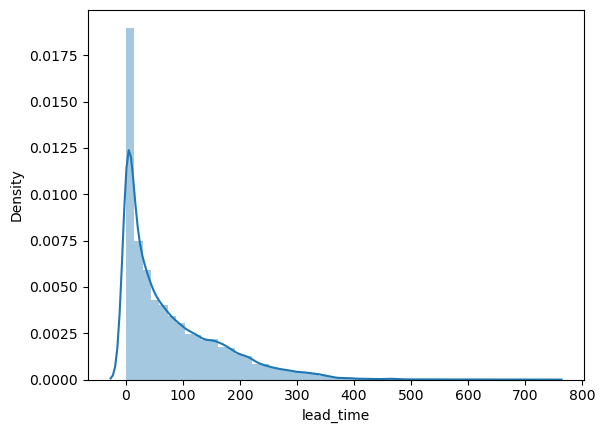

In [97]:
sns.distplot(dataframe['lead_time'])

In [98]:
dataframe['lead_time'] = np.log1p(dataframe['lead_time'])

<Axes: xlabel='lead_time', ylabel='Density'>

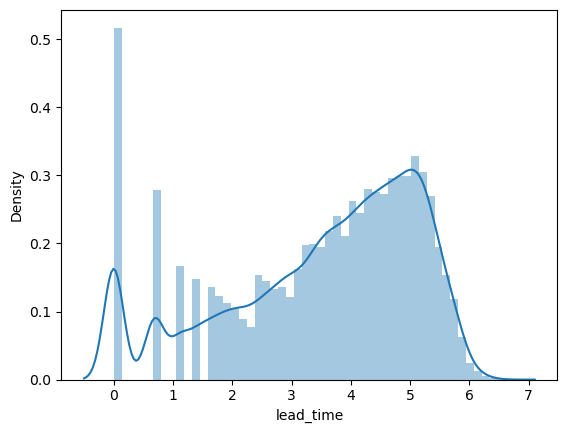

In [99]:
sns.distplot(dataframe['lead_time'])

<Axes: xlabel='adr', ylabel='Density'>

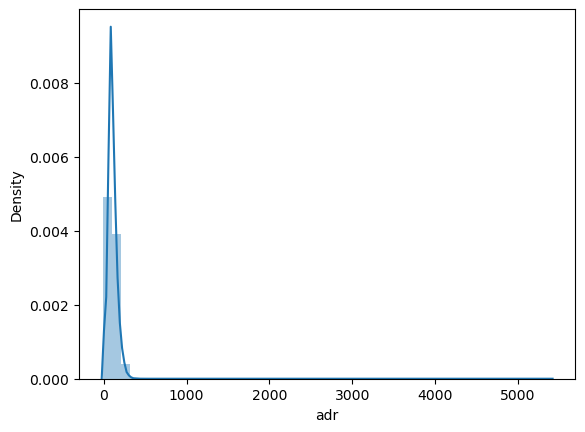

In [100]:
sns.distplot(dataframe['adr'])

In [101]:
dataframe['adr'] = np.log1p(dataframe['adr'])

<Axes: xlabel='adr', ylabel='Density'>

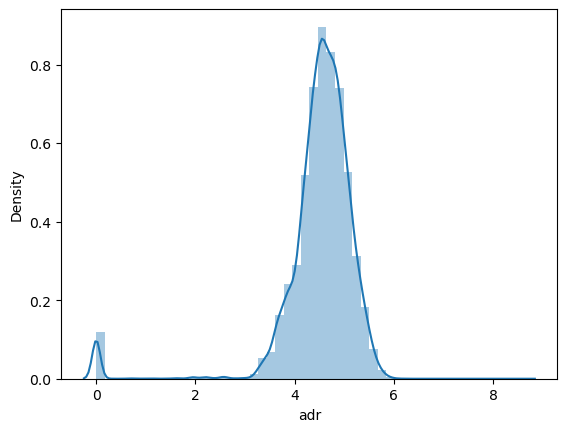

In [102]:
sns.distplot(dataframe['adr'])

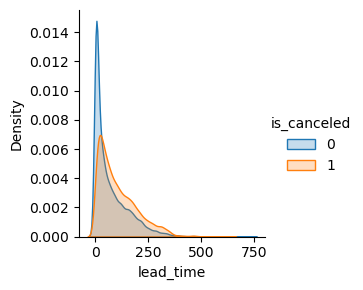

In [103]:
sns.FacetGrid(data, hue='is_canceled').map(sns.kdeplot, 'lead_time', shade=True).add_legend()

In [104]:
corr = dataframe.corr()

In [105]:
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,deposit_given,total_members,total_nights,is_family
hotel,1.000000,-0.001556,0.275060,-0.058570,0.159654,0.131631,-0.149227,0.181945,0.038395,0.071492,...,0.005400,-0.043657,0.033880,0.137756,-0.216706,0.018568,0.019960,-0.015606,-0.220036,-0.032347
arrival_date_month,-0.001556,1.000000,0.022924,-0.043950,0.081892,0.079522,0.096409,-0.004099,0.055794,0.085520,...,-0.021340,0.000145,-0.019689,0.297589,-0.007428,0.052830,-0.009522,0.166223,0.103614,0.112178
meal,0.275060,0.022924,1.000000,-0.037520,0.221846,0.140341,-0.174169,0.175158,0.117977,0.063282,...,-0.030740,-0.045967,-0.031155,0.005476,-0.069669,0.030743,-0.034300,-0.058813,-0.083557,-0.089242
country,-0.058570,-0.043950,-0.037520,1.000000,-0.105581,-0.162873,-0.021345,0.006105,0.004732,0.192058,...,0.087562,-0.001219,0.013771,-0.096379,0.039581,-0.061154,0.071243,-0.054294,-0.109356,0.024343
market_segment,0.159654,0.081892,0.221846,-0.105581,1.000000,0.633115,0.072338,0.052729,0.187595,0.220991,...,-0.140061,-0.074345,-0.048462,0.249384,-0.058270,0.263480,-0.046078,0.167140,-0.006150,0.065343
distribution_channel,0.131631,0.079522,0.140341,-0.162873,0.633115,1.000000,-0.002079,0.050552,0.003738,0.152264,...,-0.190967,-0.108181,0.022235,0.148840,-0.134582,0.140235,-0.002899,0.138773,0.131439,0.006970
reserved_room_type,-0.149227,0.096409,-0.174169,-0.021345,0.072338,-0.002079,1.000000,-0.242875,0.089842,0.058216,...,-0.037653,0.016108,-0.035834,0.187957,0.077305,0.032003,-0.052829,0.402735,0.109724,0.347360
assigned_room_type,0.181945,-0.004099,0.175158,0.006105,0.052729,0.050552,-0.242875,1.000000,0.007801,0.094752,...,0.010580,-0.083195,0.012859,0.079295,-0.066808,-0.039494,0.049490,-0.100986,-0.049536,-0.052219
customer_type,0.038395,0.055794,0.117977,0.004732,0.187595,0.003738,0.089842,0.007801,1.000000,0.127004,...,0.021097,-0.141966,-0.123506,0.111995,0.033374,0.088449,-0.033086,0.113866,-0.033469,0.081011
reservation_status,0.071492,0.085520,0.063282,0.192058,0.220991,0.152264,0.058216,0.094752,0.127004,1.000000,...,-0.052182,-0.093705,0.004451,0.119728,-0.184297,-0.120611,0.137547,0.100048,0.083984,0.050273


In [106]:
corr['is_canceled'].sort_values(ascending=False)

reservation_status                1.000000
cancellation                      1.000000
is_canceled                       1.000000
reservation_status_date           0.308243
lead_time                         0.239607
market_segment                    0.220991
country                           0.192058
distribution_channel              0.152264
deposit_given                     0.137547
customer_type                     0.127004
adr                               0.119728
total_members                     0.100048
assigned_room_type                0.094752
arrival_date_year                 0.088113
arrival_date_month                0.085520
weekday_or_weekend                0.084442
total_nights                      0.083984
stays_in_week_nights              0.082818
hotel                             0.071492
meal                              0.063282
stays_in_weekend_nights           0.060095
reserved_room_type                0.058216
previous_cancellations            0.051461
is_family  

In [107]:
dataframe.drop(['reservation_status', 'cancellation', 'arrival_date_day_of_month', 'days_in_waiting_list', 'arrival_date_week_number'], axis=1, inplace=True)

In [108]:
corr1 = dataframe.corr()

In [109]:
corr1['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
reservation_status_date           0.308243
lead_time                         0.239607
market_segment                    0.220991
country                           0.192058
distribution_channel              0.152264
deposit_given                     0.137547
customer_type                     0.127004
adr                               0.119728
total_members                     0.100048
assigned_room_type                0.094752
arrival_date_year                 0.088113
arrival_date_month                0.085520
weekday_or_weekend                0.084442
total_nights                      0.083984
stays_in_week_nights              0.082818
hotel                             0.071492
meal                              0.063282
stays_in_weekend_nights           0.060095
reserved_room_type                0.058216
previous_cancellations            0.051461
is_family                         0.050273
previous_bookings_not_canceled   -0.052182
is_repeated

In [110]:
dataframe.shape

(87351, 27)

In [111]:
dataframe.dropna(inplace=True)

In [112]:
x = dataframe.drop('is_canceled', axis=1)

In [113]:
y=dataframe['is_canceled']

In [114]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [115]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005))

In [116]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [117]:
feature_sel_model.get_support()

array([False, False, False,  True,  True, False, False, False, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True, False, False])

In [118]:
cols = x.columns

In [119]:
cols[feature_sel_model.get_support()]

Index(['country', 'market_segment', 'reservation_status_date', 'lead_time',
       'arrival_date_year', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_members'],
      dtype='object')

In [120]:
selected_feature = cols[feature_sel_model.get_support()]

In [121]:
x[selected_feature]

,country,market_segment,reservation_status_date,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,total_members
0,0.395722,0.353518,0.066038,4.700480,2016,0,1,0,0,0,4.109890,0,1,2.0
1,0.395722,0.353518,0.066038,4.700480,2016,0,1,0,0,0,4.763028,1,1,4.0
2,0.352312,0.353518,0.116279,1.098612,2016,0,1,0,0,0,4.499810,0,1,2.0
3,0.251232,0.353518,0.137931,4.488636,2016,0,2,0,0,0,4.310262,0,2,2.0
4,0.352312,0.353518,0.204545,3.044522,2016,0,2,0,0,0,4.787492,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87346,0.364777,0.147253,0.374101,5.159055,2016,3,8,0,0,4,4.777610,0,1,3.0
87347,0.196107,0.353518,0.374101,2.890372,2016,2,5,0,0,0,4.514589,0,1,2.0
87348,0.352312,0.147253,0.374101,5.181784,2016,2,5,0,0,2,0.828552,0,2,0.0
87349,0.196107,0.148364,0.359223,4.682131,2016,2,5,0,0,0,4.649857,0,0,2.0


In [122]:
x

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status_date,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,deposit_given,total_members,total_nights,is_family
0,0.234935,0.221369,0.265573,0.395722,0.353518,0.309717,0.259816,0.242228,0.152539,0.066038,...,0,0,0,4.109890,0,1,0,2.0,1,0
1,0.234935,0.221369,0.265573,0.395722,0.353518,0.309717,0.407718,0.352691,0.152539,0.066038,...,0,0,0,4.763028,1,1,0,4.0,1,1
2,0.234935,0.221369,0.265573,0.352312,0.353518,0.309717,0.300971,0.242228,0.301127,0.116279,...,0,0,0,4.499810,0,1,0,2.0,1,0
3,0.234935,0.221369,0.269654,0.251232,0.353518,0.309717,0.259816,0.242228,0.301127,0.137931,...,0,0,0,4.310262,0,2,0,2.0,2,0
4,0.234935,0.221369,0.265573,0.352312,0.353518,0.309717,0.359162,0.301441,0.301127,0.204545,...,0,0,0,4.787492,0,0,0,4.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87346,0.300427,0.268773,0.265573,0.364777,0.147253,0.148328,0.272622,0.246621,0.301127,0.374101,...,0,0,4,4.777610,0,1,0,3.0,11,1
87347,0.300427,0.268773,0.353059,0.196107,0.353518,0.309717,0.259816,0.306320,0.301127,0.374101,...,0,0,0,4.514589,0,1,0,2.0,7,0
87348,0.300427,0.268773,0.265573,0.352312,0.147253,0.148328,0.272622,0.043478,0.301127,0.374101,...,0,0,2,0.828552,0,2,0,0.0,7,0
87349,0.300427,0.268773,0.265573,0.196107,0.148364,0.309717,0.259816,0.219231,0.301127,0.359223,...,0,0,0,4.649857,0,0,0,2.0,7,0


In [123]:
y

0        0
1        0
2        1
3        0
4        1
        ..
87346    0
87347    0
87348    0
87349    0
87350    0
Name: is_canceled, Length: 87350, dtype: int64

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size= 0.25)

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
logreg = LogisticRegression()

In [128]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [129]:
y_predict = logreg.predict(x_test)

In [130]:
y_predict.shape

(21838,)

In [131]:
y_test.shape

(21838,)

In [132]:
from sklearn.metrics import confusion_matrix

In [133]:
confusion_matrix(y_test, y_predict)

array([[14972,   846],
       [ 3141,  2879]], dtype=int64)

In [134]:
from sklearn.metrics import accuracy_score

In [135]:
accuracy_score(y_test, y_predict)

0.8174283359281985